In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
EMOTION_NAMES = "admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral".split(",")
len(EMOTION_NAMES)

28

In [178]:
df = pd.read_csv("../data/translated_go_emotion.csv", index_col=0)
df = df [['text', 'text_pl'] + EMOTION_NAMES]
df = df.reset_index(drop=True)
df.head(2)

,text,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,Ten mecz bolał.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,>Seksualność nie powinna być kategorią grupuj...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='text_pl'>

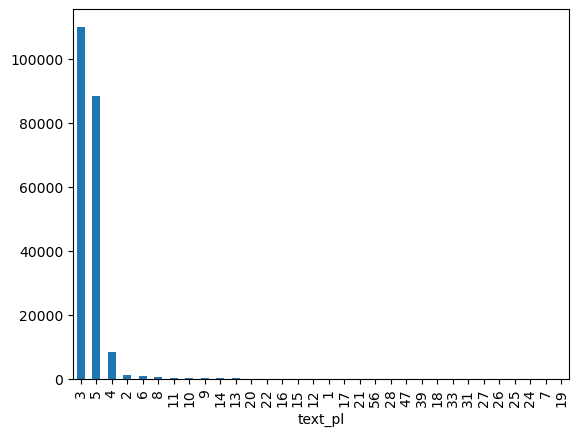

In [179]:
df.groupby('text_pl')["text_pl"].transform('count').value_counts().plot.bar()

In [180]:
group_df = df.groupby('text_pl').mean(EMOTION_NAMES)
group_df.head(2)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
text_pl,,,,,,,,,,,,,,,,,,,,,
"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym tam być, aby wziąć zamach na tę softball.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE JESTEŚ WAŻNY!"". Potrzebujemy koszulki z tym hasłem jak najszybciej!",0.0,0.0,0.2,0.4,0.2,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.4


In [181]:
golden_label = group_df.map(lambda x: 1 if x >= 2/3 else 0)
golden_label.head(2)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
text_pl,,,,,,,,,,,,,,,,,,,,,
"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym tam być, aby wziąć zamach na tę softball.",0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE JESTEŚ WAŻNY!"". Potrzebujemy koszulki z tym hasłem jak najszybciej!",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
golden_label

In [182]:
golden_label_reset_index = golden_label.reset_index()
duplicates = golden_label_reset_index[golden_label_reset_index['text_pl'].duplicated(keep=False)]

# Check if there are any duplicates
if not duplicates.empty:
    print(f"Found {duplicates.shape[0]} duplicate rows:")
    print(duplicates)
else:
    print("No duplicates found in 'text_pl'.")


No duplicates found in 'text_pl'.


<Axes: >

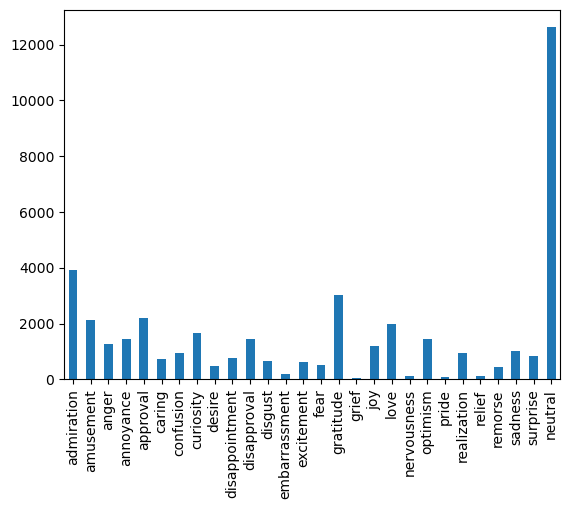

In [183]:
golden_label.sum().plot.bar()

<Axes: >

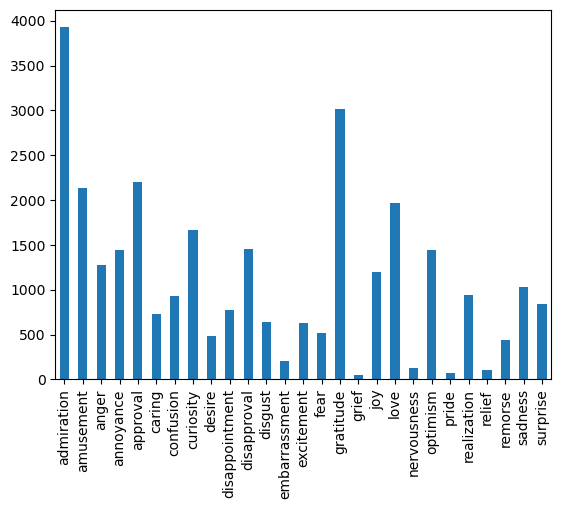

In [184]:
golden_label = golden_label.drop(columns=['neutral'])
EMOTION_NAMES = [e for e in EMOTION_NAMES if e != 'neutral']
golden_label.sum().plot.bar()

## TO DO podzilic

In [185]:
# ! pip install scikit-multilearn

In [186]:
to_split = golden_label.reset_index()

In [187]:
to_split["index"] = to_split.index

to_split = to_split[["index"] + [col for col in to_split.columns if col != "index"]]

to_split.head(3)


,index,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,0,"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym...",0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE J...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"### Z pewnością niespodzianka, ale mile widziana",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [188]:
from skmultilearn.model_selection import iterative_train_test_split

y = to_split.iloc[:, 2:].values
X = to_split.iloc[:, 0:2].values

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.1)

X_train, y_train, X_val, y_val = iterative_train_test_split(X_train, y_train, test_size=0.15)


In [250]:
test_df = np.concatenate((X_test, y_test), axis=1)
test_df = pd.DataFrame(data=test_df[:, 1:],    # values
            index=test_df[:, 0],    # 1st column as index
            columns=[['text_pl'] + EMOTION_NAMES])


In [251]:
test_df.head(3)


,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym...",0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,"Boję się nawet zapytać mamę, mogę zostać skrz...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,I nie wszystkie szpitale dziecięce potrzebują...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
test_df.to_csv("test_df.csv")

In [253]:
val_df = np.concatenate((X_val, y_val), axis=1)
val_df = pd.DataFrame(data=val_df[:, 1:],    # values
            index=val_df[:, 0],    # 1st column as index
            columns=[['text_pl'] + EMOTION_NAMES])

In [254]:
val_df.head(3)

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
2,"### Z pewnością niespodzianka, ale mile widziana",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,"Najlepszy numer! [NAZWA], [NAZWA], [NAZWA]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Nie bądź taki głupi. Terroryzm jest z natury ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
val_df.to_csv("val_df.csv")

In [189]:
X_train.shape, y_train.shape

((43921, 2), (43921, 27))

In [190]:
to_df = np.concatenate((X_train, y_train), axis=1)

In [191]:
to_df

array([[1,
        ' "Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE JESTEŚ WAŻNY!". Potrzebujemy koszulki z tym hasłem jak najszybciej!',
        0, ..., 0, 0, 0],
       [3,
        " '*Pray*, v. Prosić o unieważnienie praw wszechświata w imieniu pojedynczego petenta, rzekomo niegodnego' - [NAME].",
        0, ..., 0, 0, 0],
       [4,
        ' >Niestety, zostanie zaatakowany przez tankie. Jakże trafnie.',
        0, ..., 0, 0, 0],
       ...,
       [57409,
        '🤷🏻\u200d♀️ Jak powiedział kiedyś pewien mądry człowiek: był bękartem za życia, więc był bękartem po śmierci.',
        0, ..., 0, 0, 0],
       [57410,
        '🤷🏼\u200d♀️ Zastanawiałem się nad tym samym. Wyglądało prawie jak teriyaki.',
        0, ..., 0, 0, 1],
       [57412, '🦀🦀🦀🦀🦀🦀🦀🦀🦀 Jestem kiepski w tej grze🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀',
        0, ..., 0, 0, 0]], dtype=object)

In [192]:
golden_label = pd.DataFrame(data=to_df[:, 1:],    # values
            index=to_df[:, 0],    # 1st column as index
            columns=[['text_pl'] + EMOTION_NAMES])

In [193]:
golden_label['text_pl'] = golden_label['text_pl'].squeeze()

In [194]:
len(golden_label.index), golden_label['text_pl'].shape

(43921, (43921, 1))

In [195]:
golden_label.index

Index([    1,     3,     4,     5,     7,     8,    10,    11,    12,    13,
       ...
       57401, 57403, 57404, 57405, 57406, 57407, 57408, 57409, 57410, 57412],
      dtype='object', length=43921)

In [196]:
golden_label['index'] = golden_label.index
golden_label.tail()

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,index
57407,"🤣🤣🤣🤣 Przykro mi z powodu twojego nieszczęścia,...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,57407
57408,"🤷‍♂️ dziwny flex, ale ok",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57408
57409,🤷🏻‍♀️ Jak powiedział kiedyś pewien mądry człow...,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57409
57410,🤷🏼‍♀️ Zastanawiałem się nad tym samym. Wygląda...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,57410
57412,🦀🦀🦀🦀🦀🦀🦀🦀🦀 Jestem kiepski w tej grze🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57412


In [197]:
golden_label.reset_index(inplace=True)

golden_label.columns = golden_label.columns.get_level_values(0)

print(golden_label.columns)
print(golden_label[['text_pl', 'index']].isnull().sum())


Index(['level_0', 'text_pl', 'admiration', 'amusement', 'anger', 'annoyance',
       'approval', 'caring', 'confusion', 'curiosity', 'desire',
       'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'index'],
      dtype='object')
text_pl    0
index      0
dtype: int64


In [198]:
# golden_label['index'] = golden_label.index

golden_label.set_index(['text_pl', 'index'], inplace=True)


In [199]:
golden_label.drop(columns=['level_0'], inplace=True)


In [200]:
golden_label

,,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
text_pl,index,,,,,,,,,,,,,,,,,,,,,
"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE JESTEŚ WAŻNY!"". Potrzebujemy koszulki z tym hasłem jak najszybciej!",1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"'*Pray*, v. Prosić o unieważnienie praw wszechświata w imieniu pojedynczego petenta, rzekomo niegodnego' - [NAME].",3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
">Niestety, zostanie zaatakowany przez tankie. Jakże trafnie.",4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
">Seksualność nie powinna być kategorią grupującą. Sprawia, że różnisz się od innych ludzi, więc imo pasuje do definicji ""grupowania"".",5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Czy możesz teraz zrobić inny aplet, aby zmienić jego tapetę?",7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"🤣🤣🤣🤣 Przykro mi z powodu twojego nieszczęścia, ale to też jest zabawne.",57407,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"🤷‍♂️ dziwny flex, ale ok",57408,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"🤷🏻‍♀️ Jak powiedział kiedyś pewien mądry człowiek: był bękartem za życia, więc był bękartem po śmierci.",57409,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# import pandas as pd

# # Sample data from your question
# data = {
#     'text_pl': ["Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE J...",
#                 "'*Pray*, v. Prosić o unieważnienie praw wszec...",
#                 ">Niestety, zostanie zaatakowany przez tankie....",
#                 ">Seksualność nie powinna być kategorią grupuj...",
#                 "Czy możesz teraz zrobić inny aplet, aby zmien..."],
#     'admiration': [0, 0, 0, 0, 0],
#     'amusement': [0, 0, 0, 0, 0],
#     'anger': [0, 0, 0, 0, 0],
#     'annoyance': [0, 0, 0, 0, 0],
#     'approval': [0, 0, 0, 0, 0],
#     'index': [1, 3, 4, 5, 7]
# }

# # Create DataFrame
# df = pd.DataFrame(data)

# # Set MultiIndex using 'index' and 'text_pl'
# # df.set_index(['index', 'text_pl'], inplace=True)

# # Show the resulting DataFrame
# df


In [202]:
mean = golden_label.sum().mean()
std_dev = golden_label.sum().std()

print("Average (Mean):", mean)
print("Standard Deviation:", std_dev)


Average (Mean): 857.4814814814815
Standard Deviation: 707.3469049021447


In [203]:
int(mean+std_dev)

1564

In [204]:
int(mean-std_dev)

150

In [205]:
MAJORITY_EMOTIONS = [emotion for emotion in EMOTION_NAMES if golden_label[golden_label[emotion] == 1].shape[0] > int(mean + std_dev)]
MINORITY_EMOTIONS = [emotion for emotion in EMOTION_NAMES if golden_label[golden_label[emotion] == 1].shape[0] <= int(mean - std_dev)]
print(f"{MAJORITY_EMOTIONS=}")
print(f"{MINORITY_EMOTIONS=}")

MAJORITY_EMOTIONS=['admiration', 'amusement', 'approval', 'gratitude']
MINORITY_EMOTIONS=['grief', 'nervousness', 'pride', 'relief']


In [206]:
# TUTAJ TYLKO TE INDEKSY Z DS KTORE SA W X_TRAIN

group_df = df.groupby('text_pl')[MINORITY_EMOTIONS].mean(EMOTION_NAMES)
group_df = group_df.map(lambda x: 1 if x > 0 else 0)
# group_df = group_df.reset_index()
group_df.head(2)

,grief,nervousness,pride,relief
text_pl,,,,
"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym tam być, aby wziąć zamach na tę softball.",0,0,0,0
"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE JESTEŚ WAŻNY!"". Potrzebujemy koszulki z tym hasłem jak najszybciej!",0,0,0,0


In [207]:
group_df = group_df.reset_index()
group_df["index"] = group_df.index

group_df = group_df[["index"] + [col for col in group_df.columns if col != "index"]]

group_df.head(3)


,index,text_pl,grief,nervousness,pride,relief
0,0,"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym...",0,0,0,0
1,1,"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE J...",0,0,0,0
2,2,"### Z pewnością niespodzianka, ale mile widziana",0,0,0,0


In [208]:
group_df.shape, golden_label[MINORITY_EMOTIONS].shape

((57414, 6), (43921, 4))

In [209]:
group_df['index'].head(3)

0    0
1    1
2    2
Name: index, dtype: int64

In [210]:
golden_label.reset_index(inplace=True)
golden_label["index"].head(3)

0    1
1    3
2    4
Name: index, dtype: int64

In [213]:
golden_label.set_index("index", inplace=True)
group_df.set_index("index", inplace=True)


In [214]:
aligned_group_df = group_df.reindex(golden_label.index)


In [215]:
aligned_group_df

,text_pl,grief,nervousness,pride,relief
index,,,,,
1,"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE J...",0,0,0,0
3,"'*Pray*, v. Prosić o unieważnienie praw wszec...",0,0,0,0
4,">Niestety, zostanie zaatakowany przez tankie....",0,0,0,0
5,>Seksualność nie powinna być kategorią grupuj...,0,0,0,0
7,"Czy możesz teraz zrobić inny aplet, aby zmien...",0,0,0,0
...,...,...,...,...,...
57407,"🤣🤣🤣🤣 Przykro mi z powodu twojego nieszczęścia,...",0,0,0,0
57408,"🤷‍♂️ dziwny flex, ale ok",0,0,0,0
57409,🤷🏻‍♀️ Jak powiedział kiedyś pewien mądry człow...,0,0,0,0


In [216]:
golden_label[MINORITY_EMOTIONS] = golden_label[MINORITY_EMOTIONS] | aligned_group_df[MINORITY_EMOTIONS]
golden_label.head(2)

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
index,,,,,,,,,,,,,,,,,,,,,
1,"""Jeśli nie nosisz BRĄZU I POMARAŃCZU... NIE J...",0,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
3,"'*Pray*, v. Prosić o unieważnienie praw wszec...",0,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0


<Axes: >

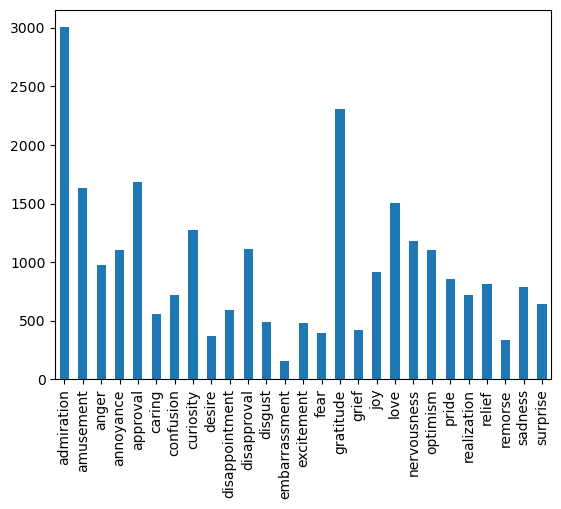

In [217]:
golden_label[EMOTION_NAMES].sum().plot.bar()

In [218]:
golden_label_copy = pd.DataFrame(golden_label)

filtered_golden_label = pd.DataFrame()

for emotion in EMOTION_NAMES:
    emotion_rows = golden_label_copy[golden_label_copy[emotion] == 1]

    if emotion_rows.shape[0] > int(mean + std_dev):
        emotion_rows = emotion_rows.iloc[:int(mean + std_dev), :]

    # Exclude rows that are already in filtered_golden_label
    emotion_rows = emotion_rows[~emotion_rows.index.isin(filtered_golden_label.index)]

    filtered_golden_label = pd.concat([filtered_golden_label, emotion_rows])


<Axes: >

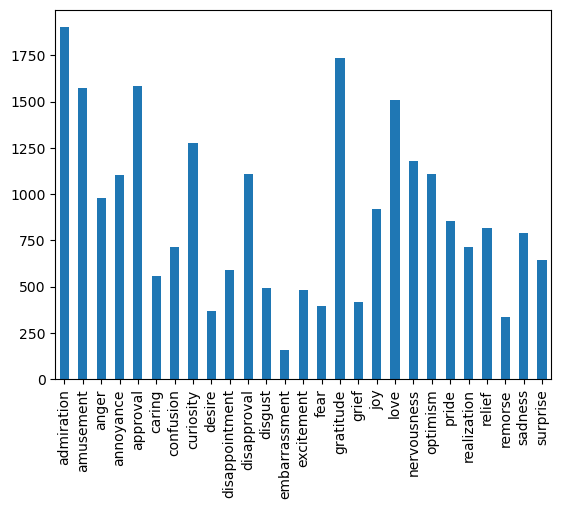

In [219]:
filtered_golden_label[EMOTION_NAMES].sum().plot.bar()

In [220]:
filtered_golden_label.head(2)

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
index,,,,,,,,,,,,,,,,,,,,,
61,"""...ostatni raz na dobre""",1,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
95,"""Błąd polegający na myleniu trendów internetow...",1,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0


In [221]:
golden_label_reset_index = filtered_golden_label.reset_index()
duplicates = golden_label_reset_index[golden_label_reset_index['text_pl'].duplicated(keep=False)]

# Check if there are any duplicates
if not duplicates.empty:
    print(f"Found {duplicates.shape[0]} duplicate rows:")
    print(duplicates)
else:
    print("No duplicates found in 'text_pl'.")


No duplicates found in 'text_pl'.


In [239]:
filtered_golden_label.reset_index(inplace=True)
filtered_golden_label.head(3)

,index,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,61,"""...ostatni raz na dobre""",1,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
1,95,"""Błąd polegający na myleniu trendów internetow...",1,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
2,245,"""Nie mam doświadczenia w byciu wredną"" to praw...",1,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0


In [240]:
filtered_golden_label.to_csv("balanced_data_set_train.csv")

In [223]:
filtered_golden_label.shape

(20232, 28)

In [238]:
filtered_golden_label.head()

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
index,,,,,,,,,,,,,,,,,,,,,
61,"""...ostatni raz na dobre""",1,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
95,"""Błąd polegający na myleniu trendów internetow...",1,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
245,"""Nie mam doświadczenia w byciu wredną"" to praw...",1,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
503,"""niezła próba""",1,0,0,0,0,0,0,0,0,...,0,0,False,0,False,0,False,0,0,0
590,"(Chociaż uwielbiam ten moment, nie była sędzią...",1,0,0,0,0,0,0,0,0,...,0,1,False,0,False,0,False,0,0,0


In [97]:
mean = filtered_golden_label.sum().mean()
std_dev = filtered_golden_label.sum().std()

print("Average (Mean):", mean)
print("Standard Deviation:", std_dev)


Average (Mean): 1244.2222222222222
Standard Deviation: 597.2295225155086


In [98]:
MAJORITY_EMOTIONS = [emotion for emotion in EMOTION_NAMES if filtered_golden_label[filtered_golden_label[emotion] == 1].shape[0] > int(mean + std_dev)]
MINORITY_EMOTIONS = [emotion for emotion in EMOTION_NAMES if filtered_golden_label[filtered_golden_label[emotion] == 1].shape[0] <= int(mean - std_dev)]
print(f"{MAJORITY_EMOTIONS=}")
print(f"{MINORITY_EMOTIONS=}")

MAJORITY_EMOTIONS=['admiration', 'amusement', 'approval', 'embarrassment', 'gratitude', 'love']
MINORITY_EMOTIONS=['desire', 'disgust', 'excitement', 'fear', 'grief', 'remorse']
